<a href="https://colab.research.google.com/github/NicoMontoya/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have explored the data a little bit.  Now I will form a strategy!

first: 
- analyze top 100.  Breakdown of lefties vs righties in the latest ranking available.
- determine if difference from general population is statistically significant.
- compare to years past

second:
- analyze matches within each year of top 100 vs top 100 players.
- determine if lefties win more or less

Third/ bonus:
- analyze matches based on surface.
- determine if lefties have any advantage on a particular surface

Fourth
- do the exact same analysis for women

In [0]:
## performa classic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats

In [0]:
## import player data
players_columns = ['player_id', 'first_name', 'last_name', 'hand', 'birth_date', 'country_code']
players = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_players.csv', names=players_columns, encoding = 'ISO-8859-1')

In [0]:
## import ranking data for 2018
rankings_columns = ['ranking_date', 'ranking', 'player_id', 'ranking_points']
current_ranking = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_current.csv', names=rankings_columns)

In [0]:
## merge players data with current rankings data
current_ranking = pd.merge(players, current_ranking, on='player_id')

In [0]:
current_ranking['ranking_date'] = pd.to_datetime(current_ranking['ranking_date'], format='%Y%m%d')

In [0]:
year_end_ranking2018 = current_ranking[current_ranking['ranking_date'] == '2018-09-24'].sort_values(by='ranking')

In [0]:
year_end_ranking2018 = year_end_ranking2018.head(100)

In [0]:
year_end_ranking2018 = year_end_ranking2018.replace({'R':0, 'L':1, 'U':0})

In [616]:
year_end_ranking2018.head()

,player_id,first_name,last_name,hand,birth_date,country_code,ranking_date,ranking,ranking_points
3735,104745,Rafael,Nadal,1,19860603.0,ESP,2018-09-24,1,8760
617,103819,Roger,Federer,0,19810808.0,SUI,2018-09-24,2,6900
4752,104925,Novak,Djokovic,0,19870522.0,SRB,2018-09-24,3,6445
7447,105223,Juan Martin,Del Potro,0,19880923.0,ARG,2018-09-24,4,5980
32,100644,Alexander,Zverev,0,19970420.0,GER,2018-09-24,5,4890


In [617]:
# import ranking data for 2010's
ranking2010s = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_10s.csv', names=rankings_columns)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ranking2010s['ranking_date'] = pd.to_datetime(ranking2010s['ranking_date'], format='%Y%m%d')

In [0]:
## merge ranking2010s with players data
ranking2010s = pd.merge(players, ranking2010s, on='player_id')
ranking2010s = ranking2010s.replace({'R':0, 'L':1})

In [0]:
year_end_ranking2017 = ranking2010s[ranking2010s['ranking_date'] == '2017-12-25'].sort_values(by='ranking')

In [0]:
year_end_ranking2017 = year_end_ranking2017.head(100)

In [0]:
year_end_ranking2016 = ranking2010s[ranking2010s['ranking_date'] == '2016-12-26'].sort_values(by='ranking')

In [0]:
year_end_ranking2016 = year_end_ranking2016.head(100)

In [0]:
year_end_ranking2015 = ranking2010s[ranking2010s['ranking_date'] == '2015-12-28'].sort_values(by='ranking')

In [0]:
year_end_ranking2015 = year_end_ranking2015.head(100)

In [0]:
year_end_ranking2014 = ranking2010s[ranking2010s['ranking_date'] == '2014-12-29'].sort_values(by='ranking')
year_end_ranking2014 = year_end_ranking2014.head(100)

In [0]:
year_end_ranking2013 = ranking2010s[ranking2010s['ranking_date'] == '2013-12-30'].sort_values(by='ranking')
year_end_ranking2013 = year_end_ranking2013.head(100)

In [0]:
year_end_ranking2012 = ranking2010s[ranking2010s['ranking_date'] == '2012-12-31'].sort_values(by='ranking')
year_end_ranking2012 = year_end_ranking2012.head(100)

In [0]:
year_end_ranking2011 = ranking2010s[ranking2010s['ranking_date'] == '2011-12-26'].sort_values(by='ranking')
year_end_ranking2011 = year_end_ranking2011.head(100)

In [0]:
year_end_ranking2010 = ranking2010s[ranking2010s['ranking_date'] == '2010-12-27'].sort_values(by='ranking')
year_end_ranking2010 = year_end_ranking2010.head(100)

Let's analyze the top 100 rankings for the last 9 years for men

In [0]:
atpyear_end_rankings = [year_end_ranking2010, year_end_ranking2011, year_end_ranking2012,
                       year_end_ranking2013, year_end_ranking2014, year_end_ranking2015,
                       year_end_ranking2016, year_end_ranking2017, year_end_ranking2018]
atpdf = pd.concat(atpyear_end_rankings)

In [0]:
ATPct = pd.crosstab(atpdf['ranking_date'], atpdf['hand'], normalize='index')

Let's bring in the women

In [0]:
#import women players info
wtaplayers = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_players.csv', names=players_columns, encoding='ISO-8859-1')


In [0]:
#import recent rankings
wtarankings_columns = ['ranking_date', 'ranking', 'player_id', 'ranking_points', 'tours']
wtacurrent_ranking = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_rankings_current.csv', names=wtarankings_columns)

In [0]:
wtacurrent_ranking['ranking_date'] = pd.to_datetime(wtacurrent_ranking['ranking_date'], format='%Y%m%d')

In [0]:
wtacurrent_ranking = pd.merge(wtaplayers, wtacurrent_ranking, on='player_id')
wtacurrent_ranking = wtacurrent_ranking.replace({'R':0, 'U':0, 'L':1})

In [0]:
wtayear_end_ranking2018 = wtacurrent_ranking[wtacurrent_ranking['ranking_date'] == '2018-12-24'].sort_values(by='ranking').head(100)

In [0]:
# import rankings for 2010s womens
wtaranking2010s = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_rankings_10s.csv', names = wtarankings_columns)

In [0]:
wtaranking2010s = pd.merge(wtaplayers, wtaranking2010s, on='player_id')

In [0]:
wtaranking2010s['ranking_date'] = pd.to_datetime(wtaranking2010s['ranking_date'], format='%Y%m%d')

In [0]:
wtaranking2010s = wtaranking2010s.replace({'R':0, 'L':1, 'U':0})

In [0]:
wtayear_end_ranking2017 = wtaranking2010s[wtaranking2010s['ranking_date']=='2017-11-20'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2016 = wtaranking2010s[wtaranking2010s['ranking_date']=='2016-12-26'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2015 = wtaranking2010s[wtaranking2010s['ranking_date']=='2015-12-28'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2014 = wtaranking2010s[wtaranking2010s['ranking_date']=='2014-12-29'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2013 = wtaranking2010s[wtaranking2010s['ranking_date']=='2013-12-30'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2012 = wtaranking2010s[wtaranking2010s['ranking_date']=='2012-12-31'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2011 = wtaranking2010s[wtaranking2010s['ranking_date']=='2011-12-26'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_ranking2010 = wtaranking2010s[wtaranking2010s['ranking_date']=='2010-12-27'].sort_values(by='ranking').head(100)

In [0]:
wtayear_end_rankings = [wtayear_end_ranking2010,wtayear_end_ranking2011, wtayear_end_ranking2012,
                    wtayear_end_ranking2013, wtayear_end_ranking2014, wtayear_end_ranking2015, wtayear_end_ranking2016,
                    wtayear_end_ranking2017, wtayear_end_ranking2018]
wtadf = pd.concat(wtayear_end_rankings)

In [0]:
WTAct = pd.crosstab(wtadf['ranking_date'], wtadf['hand'], normalize='index')

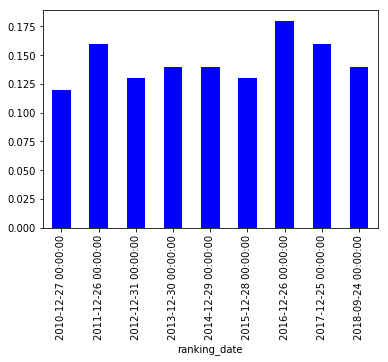

In [700]:
ATPct[1].plot.bar(color='blue')

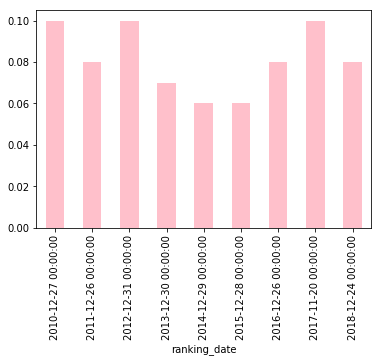

In [699]:
WTAct[1].plot.bar(color='pink')

In [701]:
stats.ttest_1samp(ATPct[1], .10)

Ttest_1sampResult(statistic=7.098852075328917, pvalue=0.00010210861082756907)

In [702]:
stats.ttest_1samp(WTAct[1], .10)

Ttest_1sampResult(statistic=-3.5068322372799012, pvalue=0.007998608765899168)

In [703]:
ATPct.describe()

hand,0,1
count,9.000000,9.000000
mean,0.855556,0.144444
std,0.018782,0.018782
min,0.820000,0.120000
25%,0.840000,0.130000
50%,0.860000,0.140000
75%,0.870000,0.160000
max,0.880000,0.180000


In [0]:
atpdf['hand'] = atpdf['hand'].astype(int)

In [711]:
atpdf.describe()

,player_id,hand,birth_date,ranking
count,900.000000,900.000000,9.000000e+02,900.00000
mean,105385.355556,0.144444,1.986571e+07,50.50000
std,4572.649840,0.351735,4.270342e+04,28.88212
min,100644.000000,0.000000,1.976042e+07,1.00000
25%,104269.000000,0.000000,1.983112e+07,25.75000
50%,104792.000000,0.000000,1.986090e+07,50.50000
75%,105380.500000,0.000000,1.989072e+07,75.25000
max,200282.000000,1.000000,1.999042e+07,100.00000


In [712]:
stats.ttest_1samp(atpdf['hand'], .10)

Ttest_1sampResult(statistic=3.790729530002155, pvalue=0.000160224068609131)

In [704]:
WTAct.describe()

hand,0.0,1.0
count,9.000000,9.000000
mean,0.918889,0.081111
std,0.016159,0.016159
min,0.900000,0.060000
25%,0.900000,0.070000
50%,0.920000,0.080000
75%,0.930000,0.100000
max,0.940000,0.100000


In [713]:
wtadf['hand'] = wtadf['hand'].astype(int)
wtadf.describe()

,player_id,hand,birth_date,ranking,ranking_points,tours
count,900.000000,900.000000,9.000000e+02,900.00000,900.000000,588.000000
mean,202238.350000,0.081111,1.988854e+07,50.50000,1697.753333,22.066327
std,2593.418202,0.273157,4.540391e+04,28.88212,1529.814735,4.961249
min,200002.000000,0.000000,1.970093e+07,1.00000,581.000000,0.000000
25%,201435.000000,0.000000,1.986033e+07,25.75000,806.750000,20.000000
50%,201517.000000,0.000000,1.989053e+07,50.50000,1109.000000,23.000000
75%,201620.000000,0.000000,1.992032e+07,75.25000,1845.750000,25.000000
max,216153.000000,1.000000,2.001083e+07,100.00000,13260.000000,34.000000


In [714]:
stats.ttest_1samp(wtadf['hand'], .10)

Ttest_1sampResult(statistic=-2.07450546095252, pvalue=0.03831645576759973)